## Binary Classification: Pima Indians Diabetes Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

** Dataset Information: **

Selected medical exams from a large database (total 768 cases) for females at least 21 years old of Pima Indian heritage.

** Attribute Information: (8 features and 1 class)**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** Objective of this project **

predict whether a patient has diabetes (class; 0 or 1) based on diagnostic variables (features)

## Data

In [11]:
options(warn=-1)
# Load Data
df  <- read.csv('pima-indians-diabetes.data',header=FALSE)
colnames(df) = c('Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'label')

In [12]:
# Inspect Data
head(df,3)

Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,label
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [13]:
dim(df)

[1] 768   9

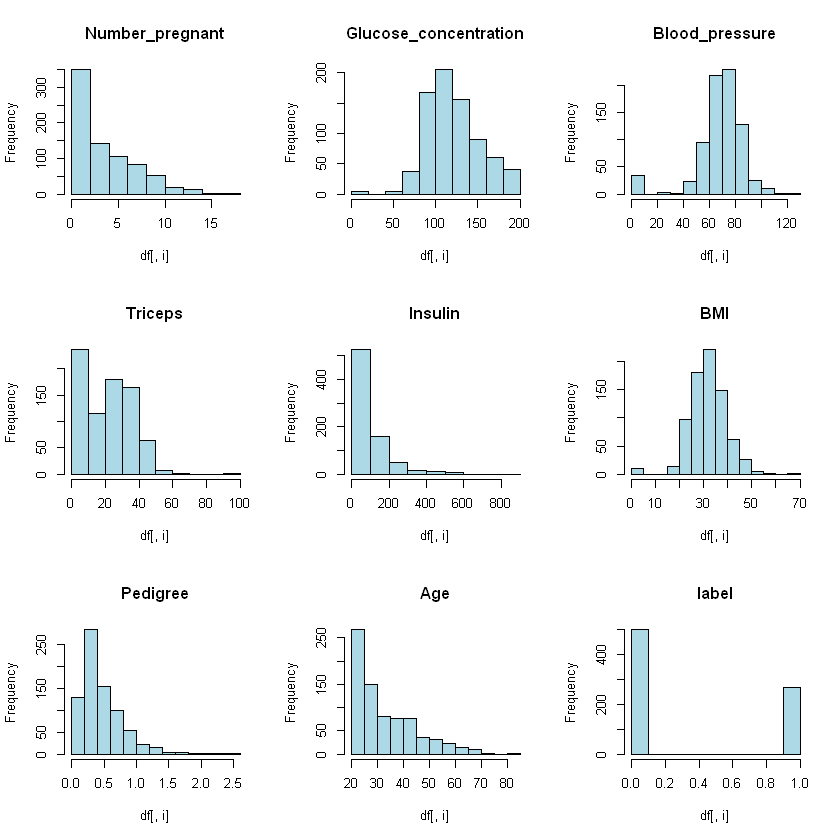

In [14]:
par(mfrow=c(3,3))
for(i in 1:9) {
    hist(df[,i], main=names(df)[i], col='lightblue')
}

corrplot 0.84 loaded


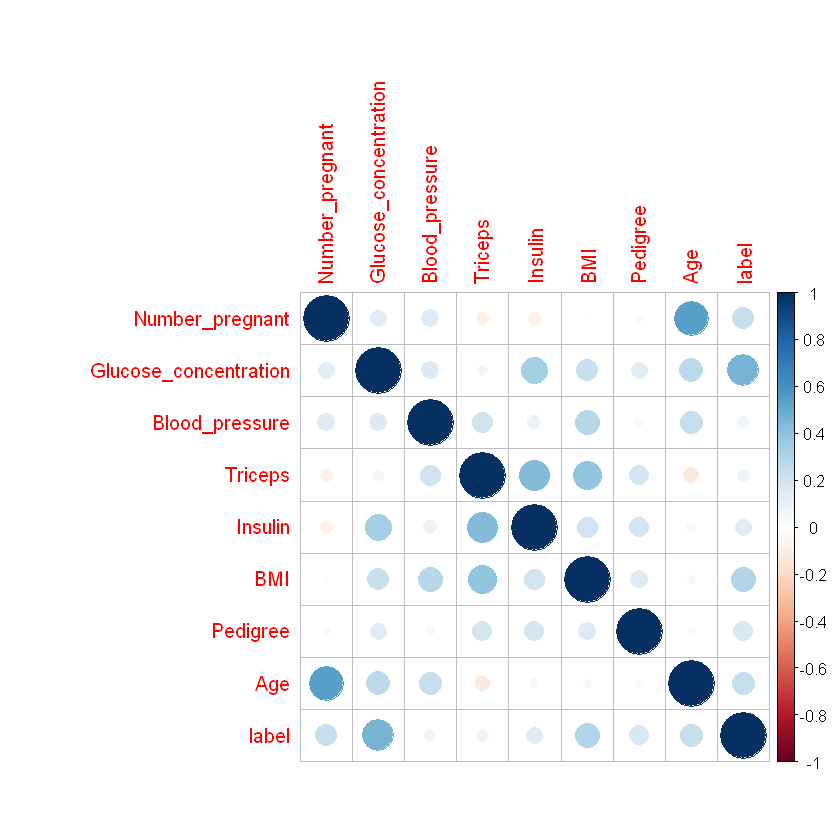

In [15]:
library(corrplot)
corrplot(cor(df), method="circle")

In [16]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : int  1 0 1 0 1 0 1 0 1 1 ...


In [17]:
summary(df)

 Number_pregnant  Glucose_concentration Blood_pressure      Triceps     
 Min.   : 0.000   Min.   :  0.0         Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0         1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0         Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9         Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2         3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0         Max.   :122.00   Max.   :99.00  
    Insulin           BMI           Pedigree           Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
     label      
 Min.   :0

In [18]:
table(df$label) #imbalanced labels


  0   1 
500 268 

In [19]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [20]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode label **

In [21]:
df$label = factor(df$label, labels=c(0,1))
table(df$label)
str(df)


  0   1 
500 268 

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


** Split Train Test Sets **

In [22]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [23]:
# standardize data
label_col = 9
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

 Number_pregnant   Glucose_concentration Blood_pressure       Triceps       
 Min.   :-1.1420   Min.   :-3.8089       Min.   :-3.5347   Min.   :-1.2784  
 1st Qu.:-0.8489   1st Qu.:-0.6861       1st Qu.:-0.3511   1st Qu.:-1.2784  
 Median :-0.2626   Median :-0.1183       Median : 0.1624   Median : 0.1450  
 Mean   : 0.0000   Mean   : 0.0000       Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6168   3rd Qu.: 0.6072       3rd Qu.: 0.5732   3rd Qu.: 0.7639  
 Max.   : 3.8415   Max.   : 2.4682       Max.   : 2.7299   Max.   : 4.8486  
    Insulin             BMI              Pedigree            Age         
 Min.   :-0.6776   Min.   :-4.05252   Min.   :-1.1815   Min.   :-1.0555  
 1st Qu.:-0.6776   1st Qu.:-0.58861   1st Qu.:-0.6872   1st Qu.:-0.7954  
 Median :-0.5044   Median : 0.03716   Median :-0.3118   Median :-0.3619  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4115   3rd Qu.: 0.57445   3rd Qu.: 0.4553   3rd Qu.: 0.6785  
 Max.   : 6.6492 

## Baseline Model

In [24]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"


Call:
summary.resamples(object = results)

Models: lda, logistic, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm, lvq 
Number of resamples: 5 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda      0.6829268 0.7049180 0.7886179 0.7637478 0.8211382 0.8211382    0
logistic 0.6910569 0.7131148 0.8048780 0.7718912 0.8211382 0.8292683    0
glmnet   0.6910569 0.7131148 0.8048780 0.7718912 0.8211382 0.8292683    0
svm      0.7131148 0.7154472 0.7886179 0.7686392 0.8048780 0.8211382    0
knn      0.6721311 0.7073171 0.7560976 0.7441823 0.7886179 0.7967480    0
nb       0.6967213 0.7398374 0.7479675 0.7474743 0.7560976 0.7967480    0
cart     0.6910569 0.6967213 0.7642276 0.7442223 0.7723577 0.7967480    0
c50      0.7049180 0.7317073 0.7398374 0.7556178 0.7886179 0.8130081    0
bagging  0.6803279 0.7723577 0.7723577 0.7702119 0.8048780 0.8211382    0
rf       0.7213115 0.7235772 0.7723577 0.7670265 0.7967480 0.8211382    0
gbm      0.7073171 0.7131148

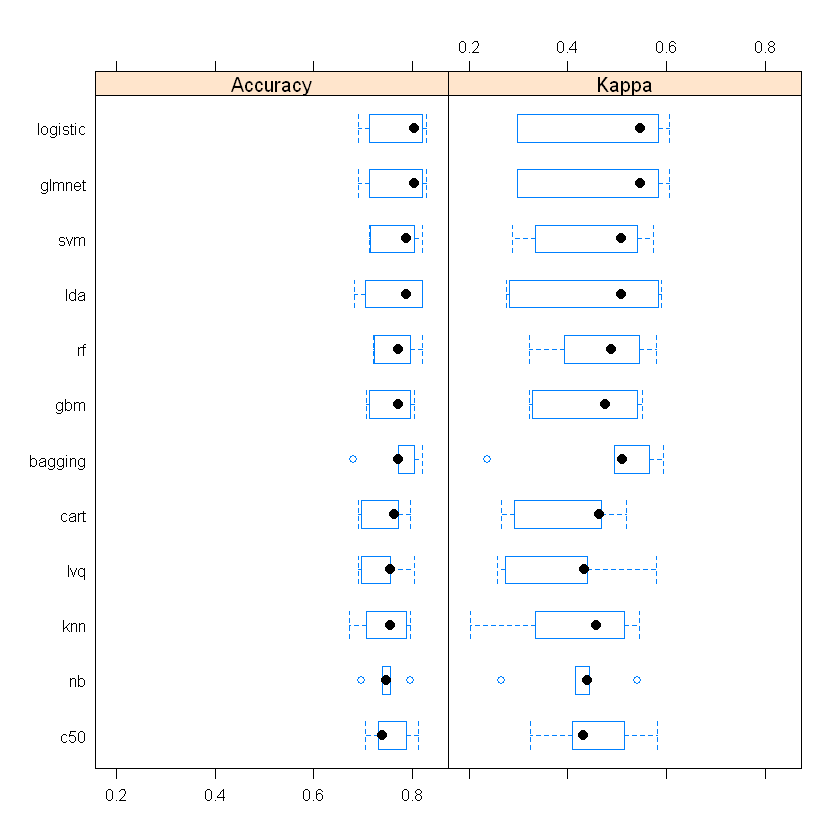

In [25]:
# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
set.seed(seed)
fit.glm <- train(label~., data=train_set, method="glm", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)
# Learning Vector Quantization
set.seed(seed)
fit.lvq <- train(label~., data=train_set, method="lvq", 
                 metric=metric, trControl=trControl)

# summarise results
results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm, lvq=fit.lvq))
summary(results)
bwplot(results)

## Parameter Tuning
5 best algorithms: glmnet, logistic, bagging, svm, rf

tuning parameters: http://topepo.github.io/caret/available-models.html

In [26]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: GLMNET


In [27]:
# default
fit.glmnet

glmnet 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0004406601  0.7718912  0.4662669
  0.10   0.0044066011  0.7702652  0.4619481
  0.10   0.0440660108  0.7686392  0.4488031
  0.55   0.0004406601  0.7686392  0.4586552
  0.55   0.0044066011  0.7637612  0.4466825
  0.55   0.0440660108  0.7621218  0.4307995
  1.00   0.0004406601  0.7670132  0.4553991
  1.00   0.0044066011  0.7670265  0.4544708
  1.00   0.0440660108  0.7588831  0.4203955

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.0004406601.

glmnet 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa     
  0.0    0.0000000000  0.7621218  0.43801833
  0.0    0.0004406601  0.7621218  0.43801833
  0.0    0.0100000000  0.7621218  0.43801833
  0.0    1.0000000000  0.6563641  0.02659141
  0.1    0.0000000000  0.7718912  0.46626695
  0.1    0.0004406601  0.7718912  0.46626695
  0.1    0.0100000000  0.7670132  0.45411343
  0.1    1.0000000000  0.6514727  0.00000000
  0.5    0.0000000000  0.7686392  0.45865525
  0.5    0.0004406601  0.7686392  0.45865525
  0.5    0.0100000000  0.7654005  0.44713995
  0.5    1.0000000000  0.6514727  0.00000000
  1.0    0.0000000000  0.7670132  0.45539915
  1.0    0.0004406601  0.7670132  0.45539915
  1.0    0.0100000000  0.7670265  0.45116917
  1.0    1.0000000000  0.6514727  0.00000000

Accuracy was used to se

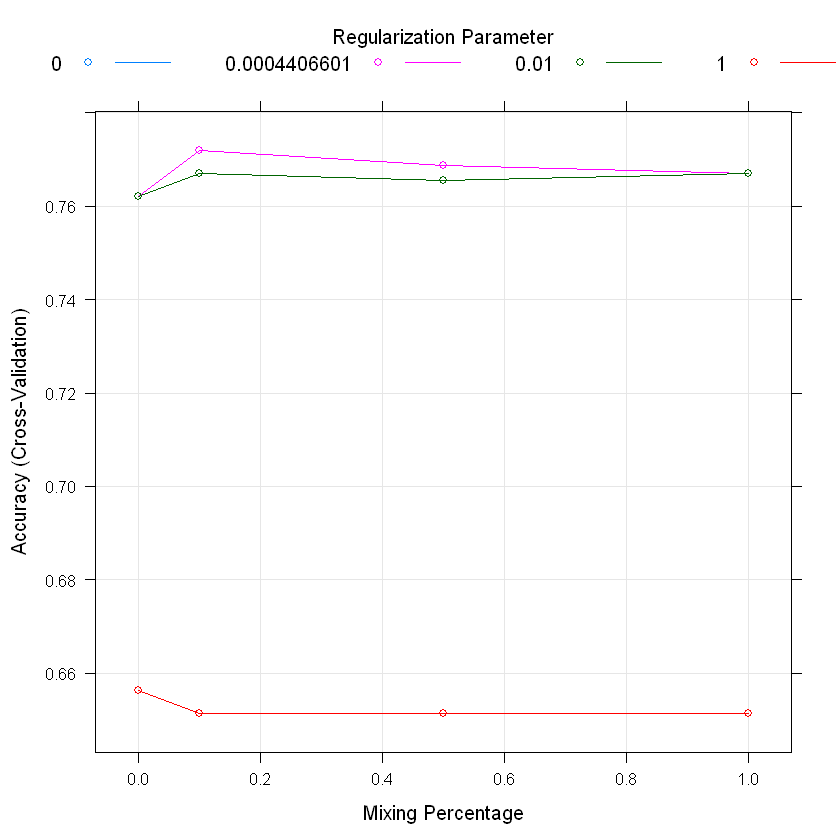

In [28]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = c(0,0.1,0.5,1),
                       lambda = c(0,0.0004406601,0.01,0.01,1))                     
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2. Logistic Regression

In [29]:
# default --> no tuning parameter
fit.glm

Generalized Linear Model 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results:

  Accuracy   Kappa    
  0.7718912  0.4662669


#### Model 3. Bagging

In [30]:
# default --> no tuning parameter
fit.treebag

Bagged CART 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results:

  Accuracy   Kappa    
  0.7702119  0.4799116


#### Model 4. Support Vector Machine 

In [31]:
# default
fit.svmRadial

Support Vector Machines with Radial Basis Function Kernel 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7686392  0.4495547
  0.50  0.7604691  0.4342225
  1.00  0.7588565  0.4358878

Tuning parameter 'sigma' was held constant at a value of 0.1096517
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1096517 and C = 0.25.

Support Vector Machines with Radial Basis Function Kernel 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  sigma      C     Accuracy   Kappa    
  0.0100000  0.10  0.6514727  0.0000000
  0.0100000  0.25  0.7149140  0.2574575
  0.0100000  1.00  0.7735306  0.4627720
  0.0100000  2.00  0.7751699  0.4679623
  0.0100000  3.00  0.7686392  0.4537437
  0.0100000  4.00  0.7686525  0.4526310
  0.0500000  0.10  0.7312408  0.3133870
  0.0500000  0.25  0.7670265  0.4460789
  0.0500000  1.00  0.7637612  0.4428967
  0.0500000  2.00  0.7556044  0.4238363
  0.0500000  3.00  0.7588431  0.4341029
  0.0500000  4.00  0.7572171  0.4310110
  0.1000000  0.10  0.7198454  0.2791114
  0.1000000  0.25  0.7686525  0.4501065
  0.1000000  1.00  0.7604825  0.4402184
  0.1000000  2.00  0.7523391  0.4237718
  0.1000000  3.00  0.7442090  0.4051447
  0.1000000  4.00 

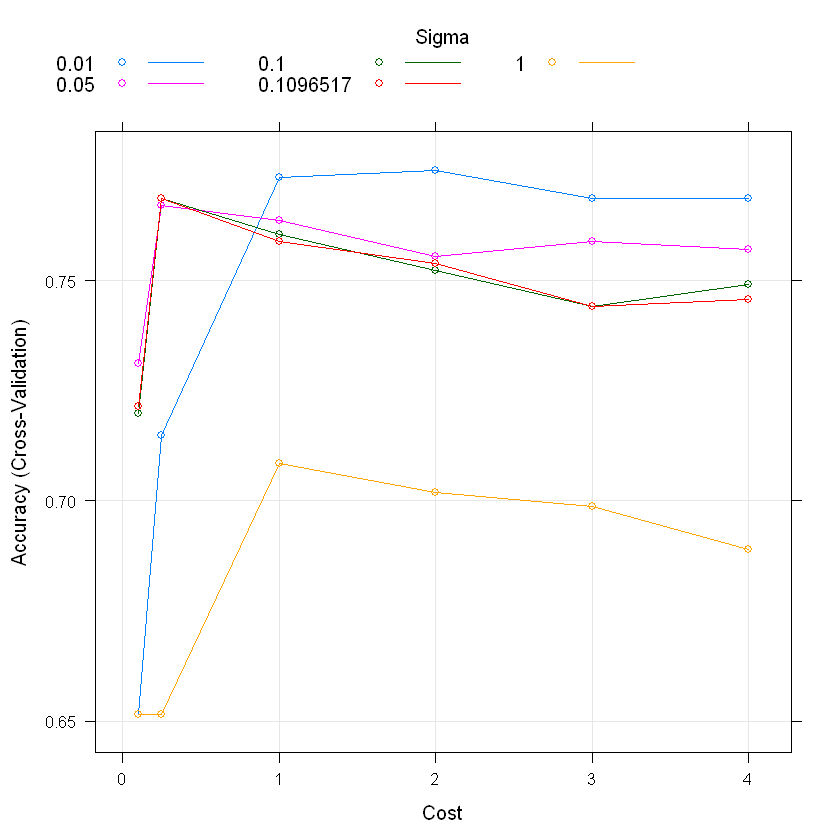

In [32]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.05,0.01,0.1,0.1096517,1), 
                       .C=c(0.1,0.25,1,2,3,4))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)
final.model <- gridSearch

#### Model 5: Random Forest 

In [33]:
# default
fit.rf

Random Forest 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.7670265  0.4654351
  5     0.7653739  0.4664049
  8     0.7653739  0.4653565

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Random Forest 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7605091  0.4403025
   2    0.7718912  0.4738917
   3    0.7718779  0.4761667
   4    0.7735173  0.4799809
   5    0.7686392  0.4714725
   6    0.7653739  0.4615099
   7    0.7653739  0.4628497
   8    0.7604958  0.4526637
   9    0.7702519  0.4766825
  10    0.7670132  0.4697519

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


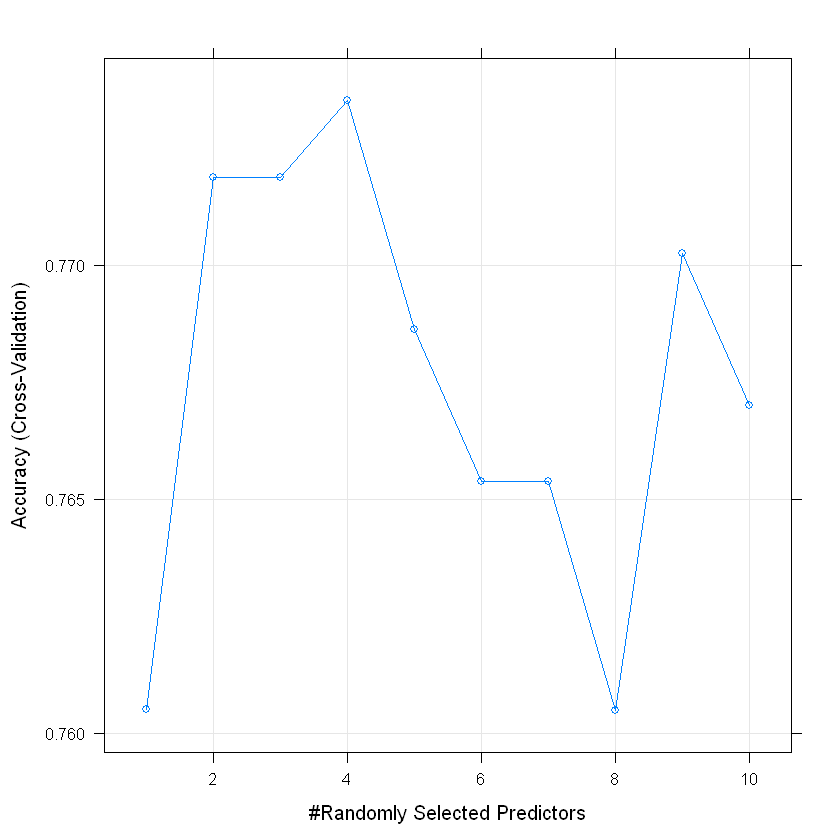

In [34]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.mtry=c(1:10))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.01 and C = 2

In [35]:
library(kernlab)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.01), C=2)
print(final.model)


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 353 

Objective Function Value : -661.8095 
Training error : 0.216612 


#### Save and load the final model

In [36]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [37]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 353 

Objective Function Value : -661.8095 
Training error : 0.216612 


#### Final Model Evaluation with Test set

In [38]:
predictions = predict(final.model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 92 21
         1  8 33
                                          
               Accuracy : 0.8117          
                 95% CI : (0.7409, 0.8701)
    No Information Rate : 0.6494          
    P-Value [Acc > NIR] : 7.279e-06       
                                          
                  Kappa : 0.5622          
 Mcnemar's Test P-Value : 0.02586         
                                          
            Sensitivity : 0.9200          
            Specificity : 0.6111          
         Pos Pred Value : 0.8142          
         Neg Pred Value : 0.8049          
             Prevalence : 0.6494          
         Detection Rate : 0.5974          
   Detection Prevalence : 0.7338          
      Balanced Accuracy : 0.7656          
                                          
       'Positive' Class : 0               
                                          

## Summary

- Best model: **SVM** w/ param: sigma=0.01, C=2


- Accuracy of test set: **81.2%**